## MLPs

In [52]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [53]:
# Simple perceptron from sklearn
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # For setosa class

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred


array([ True, False])

In [54]:
# MLP Regressors

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()    #JSON/dictionary format
X_train_full, X_test, y_trian_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_trian_full, random_state=42
)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
print(f"{rmse = }")

rmse = 0.5053326657968523


## Tensorflow/Keras

In [55]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [56]:
# convert to 0 - 1 pixel value
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

# names for readability
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(f"{class_names[y_train[0]] = }")

class_names[y_train[0]] = 'Ankle boot'


In [132]:
tf.keras.backend.clear_session()

# Create model
# tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [133]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276,710 (1.06 MB)

 Trainable params: 276,710 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
# model layer names
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

In [135]:
# weights and biases of specific layer
weights, biases = model.layers[1].get_weights()
weights # shape is (784, 300), 28x28 input to 300 neurons

array([[-0.00214763,  0.04217005, -0.01359264, ...,  0.04127686,
        -0.00964607,  0.00786853],
       [-0.05367707, -0.04987423, -0.00574297, ...,  0.00193309,
         0.02480043,  0.03665482],
       [-0.03029599, -0.0282958 ,  0.06901331, ..., -0.03012808,
         0.00808974,  0.00169565],
       ...,
       [ 0.05920486, -0.02653132,  0.0226901 , ...,  0.03580343,
        -0.05357171, -0.0589243 ],
       [ 0.06552961, -0.0662813 ,  0.00462765, ..., -0.0566215 ,
         0.02935877,  0.03933312],
       [-0.01418095, -0.06898477,  0.00691406, ..., -0.04959926,
        -0.0670018 , -0.0362552 ]], dtype=float32)

In [136]:
# compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Note that sparse_categorical_cross_entropy is used here since our target is
# between 0 and 9, representing categories. If the target is a vector representing
# a specific category ([0, 0, 1, 0,] to indicate category 3), then we would
# use categorical_crossentropy

In [137]:
# train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6579 - loss: 1.0483 - val_accuracy: 0.8236 - val_loss: 0.5046
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8249 - loss: 0.5039 - val_accuracy: 0.8360 - val_loss: 0.4538
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8436 - loss: 0.4461 - val_accuracy: 0.8444 - val_loss: 0.4289
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8555 - loss: 0.4130 - val_accuracy: 0.8510 - val_loss: 0.4086
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8630 - loss: 0.3888 - val_accuracy: 0.8514 - val_loss: 0.3987
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8698 - loss: 0.3699 - val_accuracy: 0.8556 - val_loss: 0.3883
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8746 - loss: 0.3543 - val_accuracy: 0.8594 - val_loss: 0.3814
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8783 - loss: 0.3410 - 

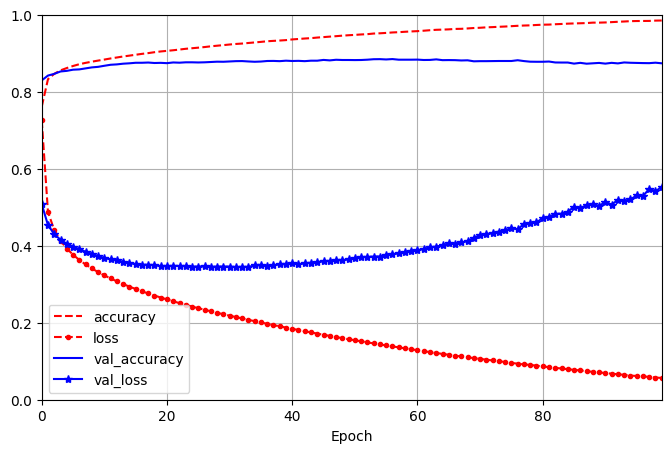

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [114]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8735 - loss: 0.3638


[0.366451233625412, 0.8748000264167786]

In [118]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  , 0.9 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)